# Práctica dirigida: Representación y Selección


a) Representación del problema (1):


In [1]:
import random
import numpy as np
# Funciones para covertir entre 
# representacion de entrero <> string binario <> string codigo gray
# 

def dec2BinStr(dec: int, len=0):
    # 8 =>  "100"
    a = dec
    result = ""
    if a == 0:
        result = "0"
    while(a > 0):
        result = str(a & 1) + result
        a = a >> 1

    if len != 0:
        result = result.zfill(len)
    return result

def binInt2GrayInt(binInt: int)->int:
    # 8 => 12
    # debido aque  8= "1100" en codigo gray
    # y  "1100" = 12 en binario
    shiftedA = binInt >> 1
    return binInt ^ shiftedA

def grayInt2BinInt(gray: int):
    # 12 => 8
    # inverso de la binInt2GrayInt
    grayBits = gray
    result = gray
    while(grayBits > 0):
        grayBits = grayBits >> 1
        result = result ^ grayBits
    return result

def dec2GrayStr(dec: int, len = 0):
    # 8 => "1100"
    return dec2BinStr(binInt2GrayInt(dec) , len  )

def GrayStr2dec(gray: str):
    # "1100" => 8
    return grayInt2BinInt( Str2Dec(gray) )

def Str2Dec (strBin : str):
    # "100" => 8
    # "1100" => 12
    return  int(strBin, 2)

def scaleBinToRange ( bin:int , bin_tam:int, interval : tuple, decimals = 3):
    hiR , loR = interval[1] , interval[0]
    hiB  =(2**bin_tam)-1
    
    return  round  (loR + ( bin*((hiR - loR)/(hiB))) , decimals)



In [2]:
binInt2GrayInt(8)

12


• implemente un programa en python que represente el cromosoma como una cadena binaria de 10 dı́gitos (10 bits) y muestre imprima el Fenotipo y su representación binaria para una población de 10 individuos.

In [3]:
cantidad = 10
tamanio_gen = 10
interval = (-4 , -1)
poblacion = []
for i in range(cantidad):
    poblacion.append(random.randint(0,(2**tamanio_gen)-1))
    

print(" ----------------Cromosomas Binarios----------------")
for indv in poblacion :
    geno = dec2BinStr(indv,len = tamanio_gen)
    feno = scaleBinToRange(indv , tamanio_gen , interval)
    print( "Genotipo : ",  geno  , "(" ,indv,")"," Fenotipo :",  feno )


 ----------------Cromosomas Binarios----------------
Genotipo :  0101010100 ( 340 )  Fenotipo : -3.003
Genotipo :  0000101111 ( 47 )  Fenotipo : -3.862
Genotipo :  0110010001 ( 401 )  Fenotipo : -2.824
Genotipo :  0110101110 ( 430 )  Fenotipo : -2.739
Genotipo :  0001110001 ( 113 )  Fenotipo : -3.669
Genotipo :  1011010011 ( 723 )  Fenotipo : -1.88
Genotipo :  0110100000 ( 416 )  Fenotipo : -2.78
Genotipo :  1110111111 ( 959 )  Fenotipo : -1.188
Genotipo :  0000100100 ( 36 )  Fenotipo : -3.894
Genotipo :  0000101111 ( 47 )  Fenotipo : -3.862


In [4]:
type(poblacion)

list

• Realizar lo mismo del ı́tem anterior para la representación en código de Gray.

In [5]:
print(" ----------------Cromosomas Codigo gray----------------")
for indv in poblacion :
    geno = dec2GrayStr(indv,len = tamanio_gen)
    feno = scaleBinToRange(indv , tamanio_gen , interval)
    print( "Genotipo : ",  geno  , "(" ,indv,")"," Fenotipo :",  feno )


 ----------------Cromosomas Codigo gray----------------
Genotipo :  0111111110 ( 340 )  Fenotipo : -3.003
Genotipo :  0000111000 ( 47 )  Fenotipo : -3.862
Genotipo :  0101011001 ( 401 )  Fenotipo : -2.824
Genotipo :  0101111001 ( 430 )  Fenotipo : -2.739
Genotipo :  0001001001 ( 113 )  Fenotipo : -3.669
Genotipo :  1110111010 ( 723 )  Fenotipo : -1.88
Genotipo :  0101110000 ( 416 )  Fenotipo : -2.78
Genotipo :  1001100000 ( 959 )  Fenotipo : -1.188
Genotipo :  0000110110 ( 36 )  Fenotipo : -3.894
Genotipo :  0000111000 ( 47 )  Fenotipo : -3.862


• Considerando las representaciones anteriores (cadena de 10 bits y representación real) ¿cual seria el tamaño del espacio intrı́nseco?

El tamaño es 2**10 = 1024 debido a que se pueden representar valores enteros desde el 0 hasta el 1023


b) Representación del problema (2):

In [6]:
class Cromosoma:
    def __init__(self, len_genes: list , intervals: list, individuals= None ):
        if len(len_genes ) != len(intervals): print("TAMANIOS E INTERVALOS DIFIEREN EN CANTIDAD")

        self.tamanios = len_genes
        self.intervals = intervals
        if not individuals:
            self.indviduos = [ random.randint(0 , 2**tam -1 ) for tam in len_genes ]
        else: 
            self.indviduos = individuals
            
    def GensBin (self):
        return "".join([dec2BinStr(indv , len=tam) for indv , tam in zip( self.indviduos , self.tamanios) ])

    def GensGray (self):
        return "".join([dec2BinStr(indv,tam)  for indv , tam  in zip (self.indviduos ,  self.tamanios) ])

    def GenesReal (self):
        return self.indviduos

    def Fenotipos (self):
        return [scaleBinToRange(indv , tam ,  inter )  for indv , tam ,  inter  in zip(self.indviduos , self.tamanios ,self.intervals )]
    

• implemente un programa en python que represente el cromosoma como una cadena binaria donde x, y estén representados por 5 bits cada uno y luego muestre/imprima el Fenotipo y su representación binaria.

In [7]:
poblacion = []
tam_x = 5
tam_y = 5
intervalx = (-1 , 1) 
intervaly = (-1 , 1) 

for _ in range(cantidad):
    poblacion.append(Cromosoma([tam_x,tam_y] , [intervalx, intervaly]))

for cromo in poblacion:
    print("Genotipo: " , cromo.GensBin() , " Fenotipo:"  , cromo.indviduos )

Genotipo:  0000011101  Fenotipo: [0, 29]
Genotipo:  0010101111  Fenotipo: [5, 15]
Genotipo:  1110011010  Fenotipo: [28, 26]
Genotipo:  1011111011  Fenotipo: [23, 27]
Genotipo:  0010001111  Fenotipo: [4, 15]
Genotipo:  1111001000  Fenotipo: [30, 8]
Genotipo:  0001100011  Fenotipo: [3, 3]
Genotipo:  1001110111  Fenotipo: [19, 23]
Genotipo:  0111000110  Fenotipo: [14, 6]
Genotipo:  1100110101  Fenotipo: [25, 21]


• Realizar lo mismo del ı́tem anterior para la representación en código de Gray.

In [8]:
for cromo in poblacion:
    print("Genotipo: " , cromo.GensGray() , 
    " Fenotipo:"  , cromo.Fenotipos() )

Genotipo:  0000011101  Fenotipo: [-1.0, 0.871]
Genotipo:  0010101111  Fenotipo: [-0.677, -0.032]
Genotipo:  1110011010  Fenotipo: [0.806, 0.677]
Genotipo:  1011111011  Fenotipo: [0.484, 0.742]
Genotipo:  0010001111  Fenotipo: [-0.742, -0.032]
Genotipo:  1111001000  Fenotipo: [0.935, -0.484]
Genotipo:  0001100011  Fenotipo: [-0.806, -0.806]
Genotipo:  1001110111  Fenotipo: [0.226, 0.484]
Genotipo:  0111000110  Fenotipo: [-0.097, -0.613]
Genotipo:  1100110101  Fenotipo: [0.613, 0.355]


• Realizar lo mismo del ı́tem anterior para la representación real.

In [9]:
for cromo in poblacion:
    print("Genotipo: " , cromo.Fenotipos()  ,
     " Fenotipo:"  , cromo.Fenotipos() )

Genotipo:  [-1.0, 0.871]  Fenotipo: [-1.0, 0.871]
Genotipo:  [-0.677, -0.032]  Fenotipo: [-0.677, -0.032]
Genotipo:  [0.806, 0.677]  Fenotipo: [0.806, 0.677]
Genotipo:  [0.484, 0.742]  Fenotipo: [0.484, 0.742]
Genotipo:  [-0.742, -0.032]  Fenotipo: [-0.742, -0.032]
Genotipo:  [0.935, -0.484]  Fenotipo: [0.935, -0.484]
Genotipo:  [-0.806, -0.806]  Fenotipo: [-0.806, -0.806]
Genotipo:  [0.226, 0.484]  Fenotipo: [0.226, 0.484]
Genotipo:  [-0.097, -0.613]  Fenotipo: [-0.097, -0.613]
Genotipo:  [0.613, 0.355]  Fenotipo: [0.613, 0.355]



• Considerando las representaciones anteriores (cadena de 10 bits y representación real) ¿cual
seria el tamaño del espacio intrı́nseco?

El tamaño seria (2^5)*(2^5) = 1024 ya que podemos representar del 0 al 31 con "x" y del mismo modo con "y"



c) Representación del problema (3):
• implemente un programa en python que represente el cromosoma como una cadena binaria donde x1 , x2 , x3 , x4 estén representados por 6 bits cada uno y luego muestre/imprima el
Fenotipo y su representación binaria.

In [10]:
intervalx = (-1 , 1) 
a = [intervalx]*6
print(a)

[(-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1)]


In [11]:
poblacion = []
tam_x = 6
intervalx = (12 , 60) 

for _ in range(cantidad):
    poblacion.append(Cromosoma([tam_x]*4 , [intervalx] * 4))

for cromo in poblacion:
    print("Genotipo: " , cromo.GensBin() , " Fenotipo:"  , cromo.Fenotipos() )

Genotipo:  111010100000101001001110  Fenotipo: [56.19, 36.381, 43.238, 22.667]
Genotipo:  010100101010101111111101  Fenotipo: [27.238, 44.0, 47.81, 58.476]
Genotipo:  000010101111010110110100  Fenotipo: [13.524, 47.81, 28.762, 51.619]
Genotipo:  110001110001111101001011  Fenotipo: [49.333, 49.333, 58.476, 20.381]
Genotipo:  001111101001110010110011  Fenotipo: [23.429, 43.238, 50.095, 50.857]
Genotipo:  111000011101001000101000  Fenotipo: [54.667, 34.095, 18.095, 42.476]
Genotipo:  101101010100010011010101  Fenotipo: [46.286, 27.238, 26.476, 28.0]
Genotipo:  000011010101001110000010  Fenotipo: [14.286, 28.0, 22.667, 13.524]
Genotipo:  110101000001101000001010  Fenotipo: [52.381, 12.762, 42.476, 19.619]
Genotipo:  101111101000111010111111  Fenotipo: [47.81, 42.476, 56.19, 60.0]


• Realizar lo mismo del ı́tem anterior para la representación en código de Gray.

In [12]:
for cromo in poblacion:
    print("Genotipo: " , cromo.GensGray() , 
    " Fenotipo:"  , cromo.Fenotipos() )

Genotipo:  111010100000101001001110  Fenotipo: [56.19, 36.381, 43.238, 22.667]
Genotipo:  010100101010101111111101  Fenotipo: [27.238, 44.0, 47.81, 58.476]
Genotipo:  000010101111010110110100  Fenotipo: [13.524, 47.81, 28.762, 51.619]
Genotipo:  110001110001111101001011  Fenotipo: [49.333, 49.333, 58.476, 20.381]
Genotipo:  001111101001110010110011  Fenotipo: [23.429, 43.238, 50.095, 50.857]
Genotipo:  111000011101001000101000  Fenotipo: [54.667, 34.095, 18.095, 42.476]
Genotipo:  101101010100010011010101  Fenotipo: [46.286, 27.238, 26.476, 28.0]
Genotipo:  000011010101001110000010  Fenotipo: [14.286, 28.0, 22.667, 13.524]
Genotipo:  110101000001101000001010  Fenotipo: [52.381, 12.762, 42.476, 19.619]
Genotipo:  101111101000111010111111  Fenotipo: [47.81, 42.476, 56.19, 60.0]


• Realizar lo mismo del ı́tem anterior para la representación real.

In [13]:
for cromo in poblacion:
    print("Genotipo: " , cromo.Fenotipos()  ,
     " Fenotipo:"  , cromo.Fenotipos() )

Genotipo:  [56.19, 36.381, 43.238, 22.667]  Fenotipo: [56.19, 36.381, 43.238, 22.667]
Genotipo:  [27.238, 44.0, 47.81, 58.476]  Fenotipo: [27.238, 44.0, 47.81, 58.476]
Genotipo:  [13.524, 47.81, 28.762, 51.619]  Fenotipo: [13.524, 47.81, 28.762, 51.619]
Genotipo:  [49.333, 49.333, 58.476, 20.381]  Fenotipo: [49.333, 49.333, 58.476, 20.381]
Genotipo:  [23.429, 43.238, 50.095, 50.857]  Fenotipo: [23.429, 43.238, 50.095, 50.857]
Genotipo:  [54.667, 34.095, 18.095, 42.476]  Fenotipo: [54.667, 34.095, 18.095, 42.476]
Genotipo:  [46.286, 27.238, 26.476, 28.0]  Fenotipo: [46.286, 27.238, 26.476, 28.0]
Genotipo:  [14.286, 28.0, 22.667, 13.524]  Fenotipo: [14.286, 28.0, 22.667, 13.524]
Genotipo:  [52.381, 12.762, 42.476, 19.619]  Fenotipo: [52.381, 12.762, 42.476, 19.619]
Genotipo:  [47.81, 42.476, 56.19, 60.0]  Fenotipo: [47.81, 42.476, 56.19, 60.0]


• Considerando las representaciones anteriores (cadena de bits, representación real) ¿cual seria el tamaño del espacio intrı́nseco?

El tamaño seria (2^6)\*(2^6)\*(2^6)*(2^6) = 16777216 ya que podemos representar del 0 al 63 con cada uno de los genes.


In [14]:
(2**6)*(2**6)*(2**6)*(2**6)

16777216

In [17]:
def mutarBinario(cromo: Cromosoma, rate = 0.01) -> Cromosoma:    
    if (random.random()  < rate):
        return  mutarCromo(cromo)
    return cromo

def mutarGray(cromo: Cromosoma, rate = 0.01) -> Cromosoma:
    if (random.random()  < rate):
        return  mutarCromo(cromo , usingGray=True)
    return cromo

def mutarCromo ( cromo:Cromosoma ,  usingGray = False):
    indRandom = random.randint(0 , len(cromo.indviduos) -1)
    idxRandom = random.randint(0 , cromo.tamanios[indRandom]-1)
    firstHalf = cromo.indviduos[:indRandom].copy()
    medio = [ bitflip(cromo.indviduos[indRandom]  ,  idxRandom , cromo.tamanios[indRandom], usingGray)]
    seconHalf = cromo.indviduos[indRandom+1:].copy()
    return Cromosoma(cromo.tamanios , cromo.intervals , individuals= firstHalf+ medio + seconHalf)

def bitflip(a  : int  , idx : int  , tam : int  , usingGray = False):
    stra =   dec2BinStr(a , len = tam) if not usingGray else dec2GrayStr(a , len = tam)
    strFlip = stra[:idx]  + ("1" if stra[idx]=="0" else "0")  + stra[ idx+1 :]
    numFlip = Str2Dec(strFlip) if not usingGray else GrayStr2dec(strFlip) 
    return  numFlip



def reproducirBinario(cromoA: Cromosoma, cromoB: Cromosoma) -> Cromosoma:
    #print ("Ca" , isinstance(cromoA , Cromosoma))
    #print ("Cb" , isinstance(cromoB , Cromosoma))
    return reproducirCromo (cromoA, cromoB )

def reproducirGray(cromoA: Cromosoma, cromoB: Cromosoma) -> Cromosoma:
    return reproducirCromo (cromoA, cromoB , usingGray=True)

def reproducirCromo (cromoA: Cromosoma, cromoB: Cromosoma , usingGray =False) -> Cromosoma:
    indRandom = random.randint(0 , len(cromoA.indviduos) -1)
    idxRandom = random.randint(1 , cromoA.tamanios[indRandom]-2)
    
    firstHalf = cromoA.indviduos[:indRandom].copy()
    medio = [ combinar(cromoA.indviduos[indRandom] , cromoB.indviduos[indRandom] , idxRandom ,cromoA.tamanios[indRandom] , usingGray )]
    seconHalf = cromoB.indviduos[indRandom+1:].copy()

    return Cromosoma(cromoA.tamanios , cromoA.intervals , individuals= firstHalf+ medio + seconHalf)

def combinar (a: int  , b :int  , idx:int  , tam:int , usingGray = False):
    str_a =  dec2BinStr(a , len = tam) if not usingGray else dec2GrayStr(a , len = tam)
    str_b =  dec2BinStr(b , len = tam) if not usingGray else dec2GrayStr(b , len = tam)
    str_comb = str_a[:idx] + str_b[idx:]
    numComb = Str2Dec(str_comb) if not usingGray else GrayStr2dec(str_comb) 
    return numComb 


def mutarReal(cromo: Cromosoma, rate = 0.01) -> Cromosoma:
    if any(   ind > 2**tam  for  ind ,tam in zip(  cromo.indviduos ,cromo.tamanios) ):
        print ("EXESO:" , cromo.Fenotipos())
    if (random.random()  > rate):
        return cromo
    
    idxRandom = random.randint(0 ,  len(cromo.indviduos) -1)
    indvNuevo = cromo.indviduos.copy()
    indvNuevo[idxRandom] =( indvNuevo[idxRandom] + random.randint(0 , 2**cromo.tamanios[idxRandom])) %  2**cromo.tamanios[idxRandom]

    return Cromosoma(cromo.tamanios , cromo.intervals , individuals= indvNuevo)

def reproducirReal(cromoA: Cromosoma, cromoB: Cromosoma) -> Cromosoma:
    indRandom = random.randint(0 , len(cromoA.indviduos) -1)    
    firstHalf = cromoA.indviduos[:indRandom].copy()
    medio = [ (cromoA.indviduos[indRandom] +  cromoB.indviduos[indRandom]  //2) % 2**cromo.tamanios[indRandom] ]
    seconHalf = cromoB.indviduos[indRandom+1:].copy()
    indvNuevo =  firstHalf + medio + seconHalf
#    indvNuevo = [ (a+b )//2 for a , b in zip (cromoA.indviduos , cromoB.indviduos)]
    return Cromosoma(cromoA.tamanios , cromoA.intervals , individuals=indvNuevo)


In [20]:
# Combinar  255 y  0  
print(dec2BinStr(combinar( Str2Dec("11111111") ,Str2Dec("00000000") , idx = 4,tam = 8 , usingGray=False)))
# Combinar  10 y 0
print(dec2GrayStr(combinar( GrayStr2dec("1111") ,GrayStr2dec("0000") , idx =2,tam=4 , usingGray=True)))


# Combinar  255 y  0  
print(dec2BinStr( bitflip( Str2Dec("11111111") , idx = 7,tam = 8 , usingGray=False) , len=8))
# Combinar  10 y 0
print(dec2GrayStr(bitflip( GrayStr2dec("1111") ,idx= 3 ,tam=4 , usingGray=True) , len= 4))


11110000
1100
11111110
1110


In [21]:
from math import cos , sin , pi

def f1 ( x : int):
    return x**4 + 5* x**3 + 4*x**2 - 4 * x +1

def f2 ( x : int , y :int):
    return  0.2 + x**2 + y**2 - 0.1 * cos(6*pi * x) - 0.1 * sin(6 * pi * y)

def f3 ( x1 : int , x2 : int, x3 : int ,x4 : int ):
    return  ((1/6.931) - ((x1*x2)/(x3*x4)))**2

def getFitness (cromoList : list , fit):
    return [ fit(*feno) for feno in [cromo.Fenotipos() for cromo in cromoList] ]

def getFitnessReal(cromoList : list , fit ,  transposeValue = 0):
    fitness = getFitness(cromoList, fit)
    maxFitness = max(fitness)
    return [ maxFitness - fit + transposeValue for fit in fitness ]


In [22]:
print(f1 (*[-3]))
print(f2 (*[0 , 0]))
print(f3 (*[1000,1,1,1]))

-5
0.1
999711.4621669779


In [23]:
def printList(listI, title ):
    # Imprimir lista de elementos
    print(title , "-----------------")
    for ind in listI:
        print("\t" , ind)


def sortBy(a : list , b : list , mayoresPrimero = True):
    #ordena la primera lista segun la segunda lista
    pares  =  [ (ai , bi) for ai,bi in zip(a,b)]
    ordenados = sorted(pares , key = lambda x : x[1], reverse=mayoresPrimero)
    return  [x[0] for x  in ordenados]



2. Gestión de la población: de la teorı́a se sabe que los métodos de selección son independientes del método de representación del algoritmo evolutivo, implemente los siguientes métodos de selección en python:


- método de selección proporcional

In [24]:
def seleccionProporcional(cromos: list, f, transpose_Value=0.0000001, mayoresPrimero=True):    
    fitness = getFitnessReal(cromos ,  f)
    sumFitness = sum(fitness)
    if (sumFitness != 0): 
        probab = [round(fit/sumFitness, 2) for fit in fitness]
        #print( "F: ", fitness , " Prob: " , probab , "S : " , sumFitness)
    else: 
        #print("Fitness 0")
        #print(fitness , "S : " , sumFitness)
        probab =  [1/len(cromos) ] * len(cromos)

    #print ("F: " , fitness , "\nC : " , fenos ,"\nP: " , probab )
    return cromos, probab


def selecionarPares(nPares: int, population: list, fitness,metodoSeleccion):

    orderPop, probabilidades = metodoSeleccion(population, fitness)
    paresSelectos = []
    for _ in range(nPares):
        paresSelectos.append(
            random.choices(
                population=orderPop,
                weights=probabilidades,
                k=2)
        )
    return paresSelectos

poblacion = []
tam_x = 5
tam_y = 5
intervalx = (-1 , 1) 
intervaly = (-1 , 1) 

for _ in range(cantidad):
    poblacion.append(Cromosoma([tam_x,tam_y] , [intervalx, intervaly]))


print([
    [a.Fenotipos() , b.Fenotipos()]  for a, b in 
    selecionarPares (
        3 ,
        poblacion , 
        lambda x,y : x**2-10  + y**2-10,
        seleccionProporcional )])



[[[-0.806, 0.097], [0.355, 0.161]], [[-0.355, -0.806], [0.355, 0.161]], [[-0.355, -0.806], [-0.161, -0.097]]]


- método de selección basada en ranking lineal

In [25]:
def seleccionRankingLineal (cromos:list , f ,transpose_Value =0 ,mayoresPrimero = True , presionSeleccion = 1.5 ):    
    fitness = getFitnessReal(cromos , f )

    mu = len (cromos)
    s = presionSeleccion
    
    cromoOrdenado = sortBy(cromos , fitness , mayoresPrimero=False)
    #fenoOrdenado = sortBy(fenos, fitness , mayoresPrimero=False)
    #fitordenado  = sortBy(fitness, fitness , mayoresPrimero=False)

    probab = [
        float((2- s) / mu)  + ( (2*i *(s-1))/(mu * (mu-1))) 
        for i in range(mu)]
    
    #print ("F: " , fitordenado , "\nC : " , fenoOrdenado ,"\nP: " , probab )
    
    return cromoOrdenado , probab


print([
    [a.Fenotipos() , b.Fenotipos()]  for a, b in 
    selecionarPares (
        3 ,
        poblacion , 
        lambda x,y : x**2-10  + y**2-10,
        seleccionRankingLineal )])


[[[-0.806, 0.097], [-0.806, -0.548]], [[-0.161, -0.097], [0.613, 0.29]], [[-0.806, 0.097], [-0.806, -0.548]]]


- método de torneo

In [26]:

def seleccionTorneo (cromos:list , f,  kontestants = 5 ):
    candidatos = random.choices(population=cromos,k=kontestants)    
    fitn =  getFitnessReal(candidatos , f )
    ### Mayores primero debe ser true para que [0] sea el mayor
    campeon = sortBy(candidatos,fitn , mayoresPrimero=True)[0]
    return campeon

def parSeleccionTorneo (cromos:list , f,  kontestants = 5 ):
    parSeleccionado = []
    for i in range (2):
        parSeleccionado.append(seleccionTorneo(cromos , f , kontestants))
    return parSeleccionado

def selecionarParesTorneo(nPares: int, population: list, fitness):
    paresSelectos = []
    for _ in range(nPares):        
        paresSelectos.append(
            parSeleccionTorneo( population , fitness )
        )
    return paresSelectos


print([
    [a.Fenotipos() , b.Fenotipos()]  for a, b in 
    selecionarParesTorneo (
        3 ,
        poblacion , 
        lambda x,y : x**2-10  + y**2-10)])


[[[-0.161, -0.097], [-0.806, 0.097]], [[-0.161, -0.097], [0.613, 0.29]], [[-0.161, -0.097], [0.355, 0.161]]]


- método de selección uniforme

In [27]:
def seleccionUniforme (cromos:list , f ,transpose_Value =0 ,mayoresPrimero = True , presionSeleccion = 1.5 ):
    mu = len(cromos)
    probab = [1/mu]*mu

    return cromos , probab

print([
    [a.Fenotipos() , b.Fenotipos()]  for a, b in 
    selecionarPares (
        3 ,
        poblacion , 
        lambda x,y : x**2-10  + y**2-10,
        seleccionRankingLineal )])


[[[-0.806, 0.097], [-0.355, -0.806]], [[-0.806, 0.097], [-0.161, -0.097]], [[0.613, 0.29], [-0.161, -0.097]]]


- método de la ruleta

In [28]:
def seleccionRuleta(nPares: int, population: list, fitness,metodoSeleccion):
    orderPop, probabilidades = metodoSeleccion(population, fitness)
    paresSelectos = []

    rangesProb  = list(np.cumsum(probabilidades))

    #print ( "Ranges: " , rangesProb)
    for _ in range (nPares):
        par  = []
        for _ in range (2):
            pointer = random.random()
            idx  = 0 
            while idx  < len(rangesProb) and rangesProb[idx] < pointer : idx += 1
            #print("p :" , pointer , "idx :" , idx  , " tam : " ,  len( rangesProb))
            #print( "IDX seleccionado: " , idx , "Max :" , len(orderPop) )
            par.append(orderPop[idx%len( rangesProb)])
        paresSelectos.append(par)

    return paresSelectos




print([
    [a.Fenotipos() , b.Fenotipos()]  for a, b in 
    seleccionRuleta (
        3 ,
        poblacion , 
        lambda x,y : x**2-10  + y**2-10,
        seleccionProporcional )])


[[[-0.161, -0.097], [-0.161, -0.097]], [[-0.806, 0.097], [-0.032, -0.935]], [[0.355, 0.161], [0.613, 0.29]]]


seleccionRuleta acepta  [ seleccionProporcional , seleccion rankinlineal , seleccionUniforme]-> lista de pares cromosomas 

selecionarPares acepta  [ seleccionProporcional , seleccion rankinlineal , seleccionUniforme] -> lista de pares cromosomas

selecionarParesTorneo -> lista de pares cromosomas

3. Evaluación de la intensidad de selección: para los problemas planteados en la pregunta (1) evaluar la presión de selección considerando los siguientes casos.

In [29]:

import statistics



def intensidadDeSeleccion (genPrev:list , genActual : list , fitness ):
    prevFit  = getFitnessReal(genPrev , fitness)
    actFit = getFitnessReal(genActual , fitness)
    meanPrev =  statistics.mean( prevFit)
    meanAct  =  statistics.mean( actFit)
    stdPrev = statistics.stdev(prevFit)
    if stdPrev != 0:
        intesidad  = (meanAct - meanPrev) / stdPrev
    else : intesidad = 0
    return intesidad


def reproducir(listaDePares : list , metodoDeReproduccion )-> list:
    return  [ metodoDeReproduccion(a ,b ) for a , b in listaDePares]


print (reproducir([[1,2] , [2,3] , [-1 ,2] ] , lambda x , y : x+y ) )



[3, 5, 1]


a) Para el primer caso (ecuación 1) considerar la representación binaria, una población inicial 15 individuos del cual debe seleccionar 10 padres y crear 10 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

In [30]:
### Respuesta verdadera
imin =  0 
min = 10000.0
for i in list(np.arange(-4.0, -1.0, 0.0001)):
    if (f1(i)  < min):
        imin = i
        min =f1(i) 
print ("Minimo real = " , min , " en  : f(" ,imin ,   )


Minimo real =  -5.0196463413513275  en  : f( -2.960299999997806


In [31]:
resultadosBin = {}

In [32]:
gen_len  = 10
intervalx = (-4 , -1)
tamanio_poblacion  = 15

poblacion = [ Cromosoma([gen_len] , [intervalx]) for _ in range (15)]
iterations  = 100
fitnes = f1

metodoDeSeleccion = seleccionProporcional
metodoDeReproduccio = reproducirBinario
metodoDeMutacion  = mutarBinario
metodoFiltro = seleccionTorneo

intensidades = []

for it in range (iterations):
    padresSeleccionados = selecionarPares(10 , poblacion , fitnes , metodoDeSeleccion)
    hijos  = reproducir(padresSeleccionados ,metodoDeReproduccio )
    hijos  = [ metodoDeMutacion (hijo) for hijo in hijos ]
    intensidades.append( intensidadDeSeleccion(poblacion, hijos, fitnes))
    poblacion.extend(hijos)
    poblacion = [ metodoFiltro(poblacion , fitnes , kontestants=2) for _ in range (15) ]

    #if intensidades[-1]== 0 :
    #    break

    if (it  % 10 == 0 ) :
        optimo= poblacion[0]
        print ("it " , it , "Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

    
optimo = poblacion[0]    

print ("Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

resultadosBin["proporcional"] =  (fitnes ( *optimo.Fenotipos()) ,  optimo.Fenotipos().copy() ,  intensidades.copy())


it  0 Minimo obtenido =  3.4696156756250005  en  : f( [-1.645] )
it  10 Minimo obtenido =  -4.914965474374995  en  : f( [-2.865] )
it  20 Minimo obtenido =  -4.914965474374995  en  : f( [-2.865] )
it  30 Minimo obtenido =  -4.914965474374995  en  : f( [-2.865] )
it  40 Minimo obtenido =  -4.914965474374995  en  : f( [-2.865] )
it  50 Minimo obtenido =  -4.914965474374995  en  : f( [-2.865] )
it  60 Minimo obtenido =  -4.914965474374995  en  : f( [-2.865] )
it  70 Minimo obtenido =  -4.914965474374995  en  : f( [-2.865] )
it  80 Minimo obtenido =  -4.914965474374995  en  : f( [-2.865] )
it  90 Minimo obtenido =  -4.914965474374995  en  : f( [-2.865] )
Minimo obtenido =  -4.914965474374995  en  : f( [-2.865] )


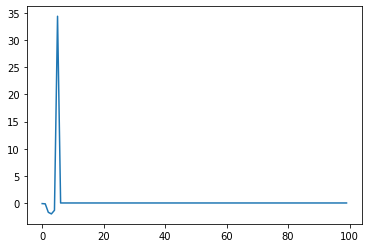

In [33]:
import matplotlib.pyplot as plt

plt.plot( list (range (len(intensidades)))[:100] , intensidades[:100],)

In [34]:
gen_len  = 10
intervalx = (-4 , -1)
tamanio_poblacion  = 15

poblacion = [ Cromosoma([gen_len] , [intervalx]) for _ in range (15)]
iterations  = 100
fitnes = f1

metodoDeSeleccion = seleccionRankingLineal
metodoDeReproduccio = reproducirBinario
metodoDeMutacion  = mutarBinario
metodoFiltro = seleccionTorneo

intensidades = []

for it in range (iterations):
    padresSeleccionados = selecionarPares(10 , poblacion , fitnes , metodoDeSeleccion)
    hijos  = reproducir(padresSeleccionados ,metodoDeReproduccio )
    hijos  = [ metodoDeMutacion (hijo) for hijo in hijos ]
    intensidades.append( intensidadDeSeleccion(poblacion, hijos, fitnes))
    poblacion.extend(hijos)
    poblacion = [ metodoFiltro(poblacion , fitnes , kontestants=2) for _ in range (15) ]

    #if intensidades[-1]== 0 :
    #    break

    if (it  % 10 == 0 ) :
        optimo= poblacion[0]
        print ("it " , it , "Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

    
optimo = poblacion[0]    

print ("Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

resultadosBin["lineal"] =  (fitnes ( *optimo.Fenotipos()) ,  optimo.Fenotipos().copy() ,  intensidades.copy())


it  0 Minimo obtenido =  -0.0515051984390027  en  : f( [-3.513] )
it  10 Minimo obtenido =  -5.019610018864013  en  : f( [-2.962] )
it  20 Minimo obtenido =  -5.019610018864013  en  : f( [-2.962] )
it  30 Minimo obtenido =  -5.019610018864013  en  : f( [-2.962] )
it  40 Minimo obtenido =  -5.019610018864013  en  : f( [-2.962] )
it  50 Minimo obtenido =  -5.019610018864013  en  : f( [-2.962] )
it  60 Minimo obtenido =  -5.019610018864013  en  : f( [-2.962] )
it  70 Minimo obtenido =  -5.019610018864013  en  : f( [-2.962] )
it  80 Minimo obtenido =  -5.019610018864013  en  : f( [-2.962] )
it  90 Minimo obtenido =  -5.019610018864013  en  : f( [-2.962] )
Minimo obtenido =  -5.019610018864013  en  : f( [-2.962] )


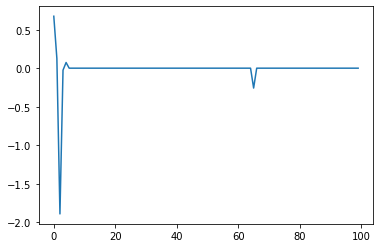

In [35]:
import matplotlib.pyplot as plt
plt.plot( list (range (len(intensidades)))[:100] , intensidades[:100],)

In [36]:
gen_len  = 10
intervalx = (-4 , -1)
tamanio_poblacion  = 15

poblacion = [ Cromosoma([gen_len] , [intervalx]) for _ in range (15)]
iterations  = 100
fitnes = f1

metodoDeReproduccio = reproducirBinario
metodoDeMutacion  = mutarBinario
metodoFiltro = seleccionTorneo

intensidades = []

for it in range (iterations):
    #padresSeleccionados = selecionarPares(10 , poblacion , fitnes , metodoDeSeleccion)
    padresSeleccionados = selecionarParesTorneo(10 , poblacion , fitnes)

    hijos  = reproducir(padresSeleccionados ,metodoDeReproduccio )
    hijos  = [ metodoDeMutacion (hijo) for hijo in hijos ]
    intensidades.append( intensidadDeSeleccion(poblacion, hijos, fitnes))
    poblacion.extend(hijos)
    poblacion = [ metodoFiltro(poblacion , fitnes , kontestants=2) for _ in range (15) ]

    #if intensidades[-1]== 0 :
    #    break

    if (it  % 10 == 0 ) :
        optimo= poblacion[0]
        print ("it " , it , "Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

    
optimo = poblacion[0]    

print ("Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )


resultadosBin["torneo"] =  (fitnes ( *optimo.Fenotipos()) ,  optimo.Fenotipos().copy() ,  intensidades.copy())


it  0 Minimo obtenido =  -1.2914754890239948  en  : f( [-2.276] )
it  10 Minimo obtenido =  -3.833075132999001  en  : f( [-3.249] )
it  20 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  30 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  40 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  50 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  60 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  70 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  80 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  90 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )


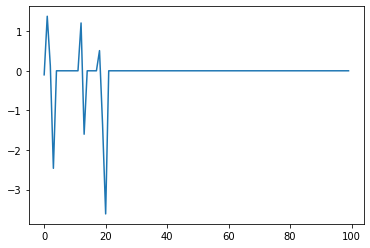

In [37]:
from  matplotlib.pyplot  import plot 
plot( list (range (len(intensidades)))[:100] , intensidades[:100],)

In [38]:
gen_len  = 10
intervalx = (-4 , -1)
tamanio_poblacion  = 15

poblacion = [ Cromosoma([gen_len] , [intervalx]) for _ in range (15)]
iterations  = 100
fitnes = f1

metodoDeSeleccion = seleccionUniforme
metodoDeReproduccio = reproducirBinario
metodoDeMutacion  = mutarBinario
metodoFiltro = seleccionTorneo

intensidades = []

for it in range (iterations):
    padresSeleccionados = selecionarPares(10 , poblacion , fitnes , metodoDeSeleccion)
    hijos  = reproducir(padresSeleccionados ,metodoDeReproduccio )
    hijos  = [ metodoDeMutacion (hijo) for hijo in hijos ]
    intensidades.append( intensidadDeSeleccion(poblacion, hijos, fitnes))
    poblacion.extend(hijos)
    poblacion = [ metodoFiltro(poblacion , fitnes , kontestants=2) for _ in range (15) ]

    #if intensidades[-1]== 0 :
    #    break

    if (it  % 10 == 0 ) :
        optimo= poblacion[0]
        print ("it " , it , "Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

    
optimo = poblacion[0]    

print ("Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

resultadosBin["uniforme"] =  (fitnes ( *optimo.Fenotipos()) ,  optimo.Fenotipos().copy() ,  intensidades.copy())


it  0 Minimo obtenido =  -3.1778168207840025  en  : f( [-3.314] )
it  10 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  20 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  30 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  40 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  50 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  60 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  70 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  80 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  90 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
Minimo obtenido =  -4.933362584624009  en  : f( [-2.874] )


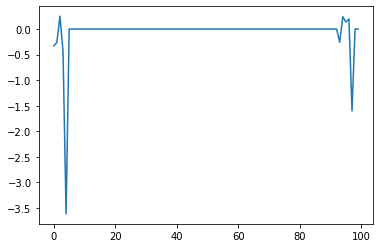

In [39]:
from  matplotlib.pyplot  import plot 
plot( list (range (len(intensidades)))[:100] , intensidades[:100],)

In [40]:
gen_len  = 10
intervalx = (-4 , -1)
tamanio_poblacion  = 15

poblacion = [ Cromosoma([gen_len] , [intervalx]) for _ in range (15)]
iterations  = 100
fitnes = f1

#metodoDeSeleccion = seleccionUniforme
metodoDeReproduccio = reproducirBinario
metodoDeMutacion  = mutarBinario
metodoFiltro = seleccionTorneo

intensidades = []

for it in range (iterations):
    #padresSeleccionados = selecionarPares(10 , poblacion , fitnes , metodoDeSeleccion)
    padresSeleccionados = seleccionRuleta(10 , poblacion , fitnes, seleccionProporcional)
    hijos  = reproducir(padresSeleccionados ,metodoDeReproduccio )
    hijos  = [ metodoDeMutacion (hijo) for hijo in hijos ]
    intensidades.append( intensidadDeSeleccion(poblacion, hijos, fitnes))
    poblacion.extend(hijos)
    poblacion = [ metodoFiltro(poblacion , fitnes , kontestants=2) for _ in range (15) ]

    #if intensidades[-1]== 0 :
    #    break

    if (it  % 10 == 0 ) :
        optimo= poblacion[0]
        print ("it " , it , "Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

    
optimo = poblacion[0]    

print ("Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

resultadosBin["ruleta"] =  (fitnes ( *optimo.Fenotipos()) ,  optimo.Fenotipos().copy() ,  intensidades.copy())



it  0 Minimo obtenido =  -0.9736356412640017  en  : f( [-2.238] )
it  10 Minimo obtenido =  -4.827855790000008  en  : f( [-2.83] )
it  20 Minimo obtenido =  -4.827855790000008  en  : f( [-2.83] )
it  30 Minimo obtenido =  -4.844505213184002  en  : f( [-2.836] )
it  40 Minimo obtenido =  -4.852568068758993  en  : f( [-2.839] )
it  50 Minimo obtenido =  -4.852568068758993  en  : f( [-2.839] )
it  60 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  70 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  80 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
it  90 Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )
Minimo obtenido =  -4.908461830063999  en  : f( [-2.862] )


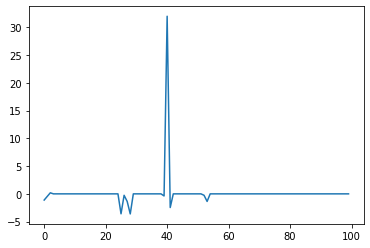

In [41]:
from  matplotlib.pyplot  import plot 
plot( list (range (len(intensidades)))[:100] , intensidades[:100],)

## Resultados Finales Parte 3.a

Metodo  proporcional  Valor hallado  :  -4.914965474374995  punto hallado : [-2.865]


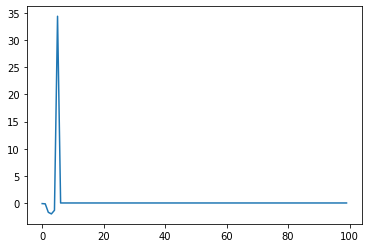

Metodo  lineal  Valor hallado  :  -5.019610018864013  punto hallado : [-2.962]


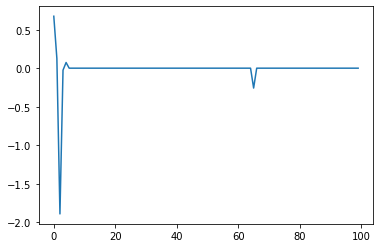

Metodo  torneo  Valor hallado  :  -4.908461830063999  punto hallado : [-2.862]


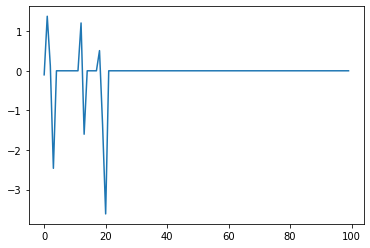

Metodo  uniforme  Valor hallado  :  -4.933362584624009  punto hallado : [-2.874]


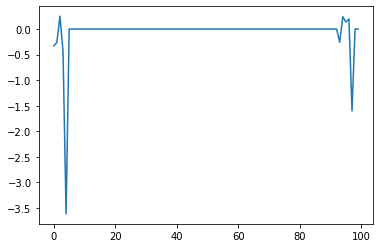

Metodo  ruleta  Valor hallado  :  -4.908461830063999  punto hallado : [-2.862]


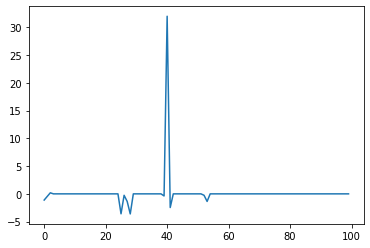

In [42]:
for key in resultadosBin.keys():
    print( "Metodo ",key , " Valor hallado  : "  , resultadosBin[key][0]  ," punto hallado :" , resultadosBin[key][1])
    plt.plot( list (range (len(resultadosBin[key][2])))[:1000] , resultadosBin[key][2][:1000], "-" )
    plt.show()



b) Para el segundo caso (ecuación 2) considerar la representación código de Gray, una población inicial 20 individuos del cual debe seleccionar 15 padres y crear 15 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

In [43]:
### Respuesta verdadera
imin =  0 
min = 10000.0
for i in list(np.arange(-1.0, 1.0, 0.01)):
    for j in list(np.arange(-1.0, 1.0, 0.01)):
        if (f2(i,j)  < min):
            imin = i
            jmin = j
            min =f2(i,j) 
print ("Minimo real = " , min , " en  : f(" ,imin , jmin )
## Minimo real muy cercano a f2(0,0) => 0


Minimo real =  0.006597327157172886  en  : f( 8.881784197001252e-16 0.08000000000000096


In [44]:
resultadosGray ={}

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 20 individuos), evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).

Metodo  proporcional representacion codigo gray

In [45]:
gen_len  = 10
intervalx = ( -1 , 1)
intervaly = ( -1 , 1)
tamanio_poblacion  = 15

poblacion = [ Cromosoma([gen_len, gen_len] , [intervalx , intervaly]) for _ in range (15)]
iterations  = 1000
fitnes = f2

metodoDeSeleccion = seleccionProporcional
metodoDeReproduccio = reproducirGray
metodoDeMutacion  = mutarGray
metodoFiltro = seleccionTorneo

intensidades = []
mostrarcada = 100
for it in range (iterations):
    padresSeleccionados = selecionarPares(10 , poblacion , fitnes , metodoDeSeleccion)
    hijos  = reproducir(padresSeleccionados ,metodoDeReproduccio )
    hijos  = [ metodoDeMutacion (hijo) for hijo in hijos ]
    intensidades.append( intensidadDeSeleccion(poblacion, hijos, fitnes))
    poblacion.extend(hijos)
    poblacion = [ metodoFiltro(poblacion , fitnes , kontestants=2) for _ in range (15) ]

    #if intensidades[-1]== 0 :
    #    break

    if (it  % mostrarcada == 0 ) :
        optimo= poblacion[0]
        print ("it " , it , "Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

    
optimo = poblacion[0]    

print ("Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )


resultadosGray["proporcional"] =  (fitnes ( *optimo.Fenotipos()) ,  optimo.Fenotipos().copy() ,  intensidades.copy())



it  0 Minimo obtenido =  0.6668404680171809  en  : f( [-0.568, 0.447] )
it  100 Minimo obtenido =  0.059210077483261375  en  : f( [-0.001, -0.238] )
it  200 Minimo obtenido =  0.059210077483261375  en  : f( [-0.001, -0.238] )
it  300 Minimo obtenido =  0.05917660087859171  en  : f( [-0.001, -0.236] )
it  400 Minimo obtenido =  0.05917660087859171  en  : f( [-0.001, -0.236] )
it  500 Minimo obtenido =  0.05917660087859171  en  : f( [-0.001, -0.236] )
it  600 Minimo obtenido =  0.05917660087859171  en  : f( [-0.001, -0.236] )
it  700 Minimo obtenido =  0.05917660087859171  en  : f( [-0.001, -0.236] )
it  800 Minimo obtenido =  0.05917660087859171  en  : f( [-0.001, -0.236] )
it  900 Minimo obtenido =  0.05917660087859171  en  : f( [-0.001, -0.236] )
Minimo obtenido =  0.05917660087859171  en  : f( [-0.001, -0.236] )


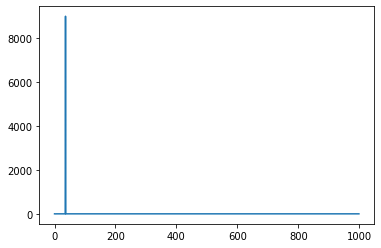

In [46]:
from  matplotlib.pyplot  import plot 
plot( list (range (len(intensidades)))[:1000] , intensidades[:1000],)

Metodo  lineal representacion codigo gray

In [47]:
gen_len  = 10
intervalx = ( -1 , 1)
intervaly = ( -1 , 1)
tamanio_poblacion  = 15

poblacion = [ Cromosoma([gen_len, gen_len] , [intervalx , intervaly]) for _ in range (15)]
iterations  = 1000
fitnes = f2

metodoDeSeleccion = seleccionRankingLineal
metodoDeReproduccio = reproducirGray
metodoDeMutacion  = mutarGray
metodoFiltro = seleccionTorneo

intensidades = []
mostrarcada = 100
for it in range (iterations):
    padresSeleccionados = selecionarPares(10 , poblacion , fitnes , metodoDeSeleccion)
    hijos  = reproducir(padresSeleccionados ,metodoDeReproduccio )
    hijos  = [ metodoDeMutacion (hijo) for hijo in hijos ]
    intensidades.append( intensidadDeSeleccion(poblacion, hijos, fitnes))
    poblacion.extend(hijos)
    poblacion = [ metodoFiltro(poblacion , fitnes , kontestants=2) for _ in range (15) ]

    #if intensidades[-1]== 0 :
    #    break

    if (it  % mostrarcada == 0 ) :
        optimo= poblacion[0]
        print ("it " , it , "Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

    
optimo = poblacion[0]    

print ("Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

resultadosGray["lineal"] =  (fitnes ( *optimo.Fenotipos()) ,  optimo.Fenotipos().copy() ,  intensidades.copy())


it  0 Minimo obtenido =  1.1101188608616421  en  : f( [0.541, -0.699] )
it  100 Minimo obtenido =  0.20461376066566545  en  : f( [-0.011, -0.071] )
it  200 Minimo obtenido =  0.0340849844957344  en  : f( [-0.011, 0.116] )
it  300 Minimo obtenido =  0.03150610556323863  en  : f( [-0.011, 0.114] )
it  400 Minimo obtenido =  0.03150610556323863  en  : f( [-0.011, 0.114] )
it  500 Minimo obtenido =  0.021512446999054677  en  : f( [-0.011, 0.105] )
it  600 Minimo obtenido =  0.01564633532921715  en  : f( [-0.009, 0.099] )
it  700 Minimo obtenido =  0.014225391708856686  en  : f( [-0.009, 0.097] )
it  800 Minimo obtenido =  0.013627088116805824  en  : f( [-0.007, 0.097] )
it  900 Minimo obtenido =  0.009409157853349448  en  : f( [-0.007, 0.089] )
Minimo obtenido =  0.008276552903569476  en  : f( [-0.005, 0.087] )


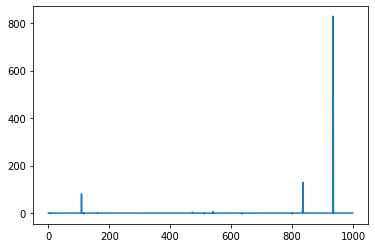

In [48]:
from  matplotlib.pyplot  import plot 
plot( list (range (len(intensidades)))[:1000] , intensidades[:1000],)

Metodo  torneo representacion codigo gray

In [49]:
gen_len  = 10
intervalx = ( -1 , 1)
intervaly = ( -1 , 1)
tamanio_poblacion  = 15

poblacion = [ Cromosoma([gen_len, gen_len] , [intervalx , intervaly]) for _ in range (15)]
iterations  = 1000
fitnes = f2

#metodoDeSeleccion = seleccionRankingLineal
metodoDeReproduccio = reproducirGray
metodoDeMutacion  = mutarGray
metodoFiltro = seleccionTorneo

intensidades = []
mostrarcada = 100
for it in range (iterations):
    #padresSeleccionados = selecionarPares(10 , poblacion , fitnes , metodoDeSeleccion)
    padresSeleccionados = selecionarParesTorneo(10 , poblacion , fitnes)
    hijos  = reproducir(padresSeleccionados ,metodoDeReproduccio )
    hijos  = [ metodoDeMutacion (hijo) for hijo in hijos ]
    intensidades.append( intensidadDeSeleccion(poblacion, hijos, fitnes))
    poblacion.extend(hijos)
    poblacion = [ metodoFiltro(poblacion , fitnes , kontestants=2) for _ in range (15) ]

    #if intensidades[-1]== 0 :
    #    break

    if (it  % mostrarcada == 0 ) :
        optimo= poblacion[0]
        print ("it " , it , "Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

    
optimo = poblacion[0]    

print ("Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

resultadosGray["torneo"] =  (fitnes ( *optimo.Fenotipos()) ,  optimo.Fenotipos().copy() ,  intensidades.copy())


it  0 Minimo obtenido =  0.4186488651610299  en  : f( [0.136, 0.329] )
it  100 Minimo obtenido =  0.2875120616927798  en  : f( [0.316, 0.359] )
it  200 Minimo obtenido =  0.2875120616927798  en  : f( [0.316, 0.359] )
it  300 Minimo obtenido =  0.2856486589665766  en  : f( [0.316, 0.361] )
it  400 Minimo obtenido =  0.17657080209035408  en  : f( [0.316, 0.14] )
it  500 Minimo obtenido =  0.15492898275710043  en  : f( [0.316, 0.128] )
it  600 Minimo obtenido =  0.1484912670117349  en  : f( [0.316, 0.124] )
it  700 Minimo obtenido =  0.11200233544101182  en  : f( [0.316, 0.075] )
it  800 Minimo obtenido =  0.11200233544101182  en  : f( [0.316, 0.075] )
it  900 Minimo obtenido =  0.11200233544101182  en  : f( [0.316, 0.075] )
Minimo obtenido =  0.11200233544101182  en  : f( [0.316, 0.075] )


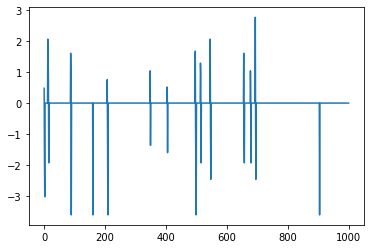

In [50]:
from  matplotlib.pyplot  import plot 
plot( list (range (len(intensidades)))[:1000] , intensidades[:1000],)

Metodo  uniforme representacion codigo gray

In [51]:
gen_len  = 10
intervalx = ( -1 , 1)
intervaly = ( -1 , 1)
tamanio_poblacion  = 15

poblacion = [ Cromosoma([gen_len, gen_len] , [intervalx , intervaly]) for _ in range (15)]
iterations  = 1000
fitnes = f2

metodoDeSeleccion = seleccionUniforme
metodoDeReproduccio = reproducirGray
metodoDeMutacion  = mutarGray
metodoFiltro = seleccionTorneo

intensidades = []
mostrarcada =100
for it in range (iterations):
    padresSeleccionados = selecionarPares(10 , poblacion , fitnes , metodoDeSeleccion)
    hijos  = reproducir(padresSeleccionados ,metodoDeReproduccio )
    hijos  = [ metodoDeMutacion (hijo) for hijo in hijos ]
    intensidades.append( intensidadDeSeleccion(poblacion, hijos, fitnes))
    poblacion.extend(hijos)
    poblacion = [ metodoFiltro(poblacion , fitnes , kontestants=2) for _ in range (15) ]

    #if intensidades[-1]== 0 :
    #    break

    if (it  % mostrarcada == 0 ) :
        optimo= poblacion[0]
        print ("it " , it , "Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

    
optimo = poblacion[0]    

print ("Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

resultadosGray["uniforme"] =  (fitnes ( *optimo.Fenotipos()) ,  optimo.Fenotipos().copy() ,  intensidades.copy())


it  0 Minimo obtenido =  0.7952808079975543  en  : f( [0.543, -0.523] )
it  100 Minimo obtenido =  0.23676844474380118  en  : f( [-0.271, -0.001] )
it  200 Minimo obtenido =  0.175279277268174  en  : f( [-0.292, -0.247] )
it  300 Minimo obtenido =  0.16768841153618197  en  : f( [-0.324, -0.247] )
it  400 Minimo obtenido =  0.16698837008677148  en  : f( [-0.324, -0.245] )
it  500 Minimo obtenido =  0.16643780344012882  en  : f( [-0.324, -0.243] )
it  600 Minimo obtenido =  0.16643780344012882  en  : f( [-0.324, -0.243] )
it  700 Minimo obtenido =  0.1644090790679784  en  : f( [-0.316, -0.239] )
it  800 Minimo obtenido =  0.16433748222186786  en  : f( [-0.316, -0.238] )
it  900 Minimo obtenido =  0.16433748222186786  en  : f( [-0.316, -0.238] )
Minimo obtenido =  0.16433748222186786  en  : f( [-0.316, -0.238] )


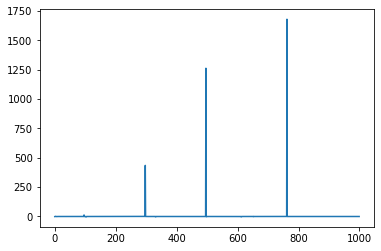

In [52]:
from  matplotlib.pyplot  import plot 
plot( list (range (len(intensidades)))[:1000] , intensidades[:1000],)

Metodo  ruleta representacion codigo gray

In [53]:
gen_len  = 10
intervalx = ( -1 , 1)
intervaly = ( -1 , 1)
tamanio_poblacion  = 15

poblacion = [ Cromosoma([gen_len, gen_len] , [intervalx , intervaly]) for _ in range (15)]
iterations  = 1000
fitnes = f2

#metodoDeSeleccion = seleccionUniforme
metodoDeReproduccio = reproducirGray
metodoDeMutacion  = mutarGray
metodoFiltro = seleccionTorneo

intensidades = []
mostrarcada = 100
for it in range (iterations):
#    padresSeleccionados = selecionarPares(10 , poblacion , fitnes , metodoDeSeleccion)
    padresSeleccionados = seleccionRuleta(10 , poblacion , fitnes , seleccionProporcional)
    padresSeleccionados = selecionarParesTorneo(10 , poblacion , fitnes)
    hijos  = reproducir(padresSeleccionados ,metodoDeReproduccio )
    hijos  = [ metodoDeMutacion (hijo) for hijo in hijos ]
    intensidades.append( intensidadDeSeleccion(poblacion, hijos, fitnes))
    poblacion.extend(hijos)
    poblacion = [ metodoFiltro(poblacion , fitnes , kontestants=2) for _ in range (15) ]

    #if intensidades[-1]== 0 :
    #    break

    if (it  % mostrarcada == 0 ) :
        optimo= poblacion[0]
        print ("it " , it , "Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

    
optimo = poblacion[0]    

print ("Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

resultadosGray["ruleta"] =  (fitnes ( *optimo.Fenotipos()) ,  optimo.Fenotipos().copy() ,  intensidades.copy())


it  0 Minimo obtenido =  0.6239912328859394  en  : f( [0.069, 0.664] )
it  100 Minimo obtenido =  0.338113867642273  en  : f( [-0.009, -0.58] )
it  200 Minimo obtenido =  0.338113867642273  en  : f( [0.009, -0.58] )
it  300 Minimo obtenido =  0.338113867642273  en  : f( [0.009, -0.58] )
it  400 Minimo obtenido =  0.32278998579190454  en  : f( [0.007, -0.546] )
it  500 Minimo obtenido =  0.3223405524385472  en  : f( [0.005, -0.546] )
it  600 Minimo obtenido =  0.3220405938879577  en  : f( [0.003, -0.546] )
it  700 Minimo obtenido =  0.3220405938879577  en  : f( [0.003, -0.546] )
it  800 Minimo obtenido =  0.3218440017754407  en  : f( [0.003, -0.548] )
it  900 Minimo obtenido =  0.3218440017754407  en  : f( [0.003, -0.548] )
Minimo obtenido =  0.3218440017754407  en  : f( [0.003, -0.548] )


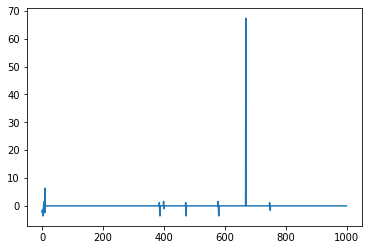

In [54]:
from  matplotlib.pyplot  import plot 
plot( list (range (len(intensidades)))[:1000] , intensidades[:1000],)

## Resultados Finales Parte 3.b

Metodo  proporcional  Valor hallado  :  0.05917660087859171  punto hallado : [-0.001, -0.236]


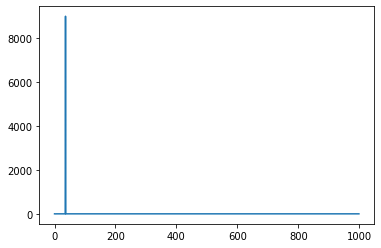

Metodo  lineal  Valor hallado  :  0.008276552903569476  punto hallado : [-0.005, 0.087]


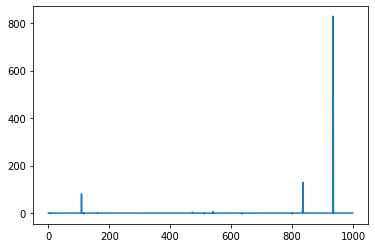

Metodo  torneo  Valor hallado  :  0.11200233544101182  punto hallado : [0.316, 0.075]


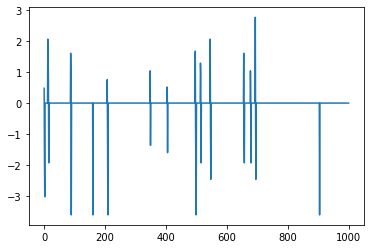

Metodo  uniforme  Valor hallado  :  0.16433748222186786  punto hallado : [-0.316, -0.238]


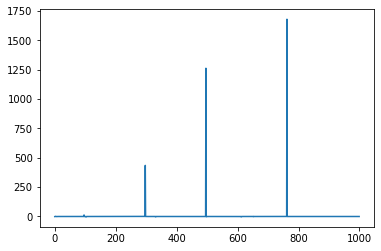

Metodo  ruleta  Valor hallado  :  0.3218440017754407  punto hallado : [0.003, -0.548]


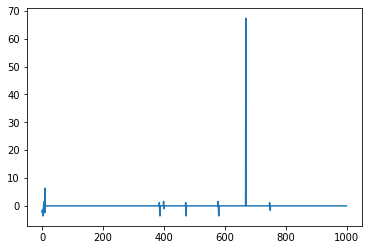

In [55]:
for key in resultadosGray.keys():
    print( "Metodo ",key , " Valor hallado  : "  , resultadosGray[key][0]  ," punto hallado :" , resultadosGray[key][1])
    plt.plot( list (range (len(resultadosGray[key][2])))[:1000] , resultadosGray[key][2][:1000])
    plt.show()

c) Para el tercer caso (ecuación 3) considerar la representación real, una población inicial 20 individuos del cual debe seleccionar 15 padres y crear 15 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

In [56]:
### Respuesta verdadera
import numpy as np

imin =  0 
min = 10000.0
step = 1
for i in list(np.arange(12.0, 60.0, step)):
    for j in list(np.arange(12.0, 60.0, step)):
        for p in list(np.arange(12.0, 60.0, step)):
            for q in list(np.arange(12.0, 60.0, step)):
                if (f3(i,j , p,q)  < min):
                    imin = i
                    jmin = j
                    pmin = p
                    qmin = q
                    min =f3(i,j , p , q) 
print ("Minimo real = " , min , " en  : f(" ,imin , jmin , pmin , qmin , " )" )

## Mutiples minimos reales con fitness 0
## 

## Minimo real 12 30 47.8 52.2

Minimo real =  2.7008571488865134e-12  en  : f( 16.0 19.0 43.0 49.0  )


In [57]:
resultadosReal = {}

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 20 individuos), evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).

Metodo proporcional representacion real

In [58]:
gen_len  = 10
interval = ( 12 , 60)
tamanio_poblacion  = 20

poblacion = [ Cromosoma([gen_len, gen_len, gen_len, gen_len] , [interval ,interval ,interval ,interval]) for _ in range (tamanio_poblacion)]
iterations  = 1000
fitnes = f3

metodoDeSeleccion = seleccionProporcional
metodoDeReproduccio = reproducirReal
metodoDeMutacion  = mutarReal
metodoFiltro = seleccionTorneo

intensidades = []
mostrarcada = 100
for it in range (iterations):
    padresSeleccionados = selecionarPares(15 , poblacion , fitnes , metodoDeSeleccion)
    hijos  = reproducir(padresSeleccionados ,metodoDeReproduccio )
    hijos  = [ metodoDeMutacion (hijo) for hijo in hijos ]
    intensidades.append( intensidadDeSeleccion(poblacion, hijos, fitnes))
    poblacion.extend(hijos)
    poblacion = [ metodoFiltro(poblacion , fitnes , kontestants=2) for _ in range (15) ]

    #if intensidades[-1]== 0 :
    #    break

    if (it  % mostrarcada == 0 ) :
        optimo= poblacion[0]
        print ("it " , it , "Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

    
optimo = poblacion[0]    

print ("Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )


resultadosReal["proporcional"] =  (fitnes ( *optimo.Fenotipos()) ,  optimo.Fenotipos().copy() ,  intensidades.copy())


it  0 Minimo obtenido =  0.0028699565865858427  en  : f( [20.962, 17.677, 59.155, 31.66] )
it  100 Minimo obtenido =  2.3917241589255652e-05  en  : f( [14.768, 17.677, 59.155, 31.66] )
it  200 Minimo obtenido =  4.429618943223545e-05  en  : f( [14.581, 17.677, 59.155, 31.66] )
it  300 Minimo obtenido =  0.0009916952722996012  en  : f( [14.581, 14.487, 59.155, 31.66] )
it  400 Minimo obtenido =  0.0007308052827352367  en  : f( [12.422, 17.677, 59.155, 31.66] )
it  500 Minimo obtenido =  5.551582350913722e-05  en  : f( [13.361, 12.845, 42.311, 26.733] )
it  600 Minimo obtenido =  3.993641425752604e-05  en  : f( [13.079, 14.815, 48.129, 26.733] )
it  700 Minimo obtenido =  6.130065450977048e-05  en  : f( [14.346, 13.642, 48.129, 26.733] )
it  800 Minimo obtenido =  0.0003677798954811752  en  : f( [13.361, 12.047, 48.129, 26.733] )
it  900 Minimo obtenido =  3.4748775608563696e-05  en  : f( [13.83, 13.971, 48.129, 26.733] )
Minimo obtenido =  4.092438609862372e-09  en  : f( [13.548, 12.0, 

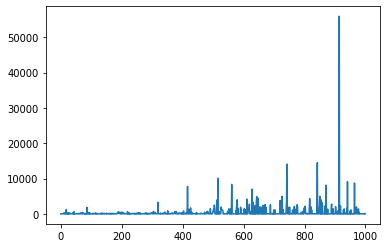

In [59]:
from  matplotlib.pyplot  import plot 
plot( list (range (len(intensidades)))[:1000] , intensidades[:1000],)

Metodo ranking lineal representacion real

In [60]:
gen_len  = 10
interval = ( 12 , 60)
tamanio_poblacion  = 20

poblacion = [ Cromosoma([gen_len, gen_len, gen_len, gen_len] , [interval ,interval ,interval ,interval]) for _ in range (tamanio_poblacion)]
iterations  = 1000
fitnes = f3

metodoDeSeleccion = seleccionRankingLineal
metodoDeReproduccio = reproducirReal
metodoDeMutacion  = mutarReal
metodoFiltro = seleccionTorneo

intensidades = []
mostrarcada = 100
for it in range (iterations):
    padresSeleccionados = selecionarPares(15 , poblacion , fitnes , metodoDeSeleccion)
    hijos  = reproducir(padresSeleccionados ,metodoDeReproduccio )
    hijos  = [ metodoDeMutacion (hijo) for hijo in hijos ]
    intensidades.append( intensidadDeSeleccion(poblacion, hijos, fitnes))
    poblacion.extend(hijos)
    poblacion = [ metodoFiltro(poblacion , fitnes , kontestants=2) for _ in range (15) ]

    #if intensidades[-1]== 0 :
    #    break

    if (it  % mostrarcada == 0 ) :
        optimo= poblacion[0]
        print ("it " , it , "Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

    
optimo = poblacion[0]    

print ("Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )
resultadosReal["lineal"] =  (fitnes ( *optimo.Fenotipos()) ,  optimo.Fenotipos().copy() ,  intensidades.copy())



it  0 Minimo obtenido =  0.19136829332602792  en  : f( [12.938, 43.062, 58.358, 16.411] )
it  100 Minimo obtenido =  0.0011786589560651272  en  : f( [13.126, 13.032, 58.358, 16.411] )
it  200 Minimo obtenido =  0.0009307331398053905  en  : f( [13.032, 12.845, 58.358, 16.411] )
it  300 Minimo obtenido =  0.0004870539364418004  en  : f( [13.173, 12.094, 58.358, 16.411] )
it  400 Minimo obtenido =  0.00044262767652755264  en  : f( [12.282, 12.891, 58.358, 16.411] )
it  500 Minimo obtenido =  0.001390328260552457  en  : f( [14.158, 12.282, 58.358, 16.411] )
it  600 Minimo obtenido =  0.00011741379222150775  en  : f( [14.956, 12.845, 58.358, 24.669] )
it  700 Minimo obtenido =  0.0003866191469950206  en  : f( [12.798, 14.018, 58.358, 24.669] )
it  800 Minimo obtenido =  0.00018890826182327744  en  : f( [14.065, 13.361, 58.358, 24.669] )
it  900 Minimo obtenido =  3.665408149903193e-05  en  : f( [14.487, 13.736, 58.358, 24.669] )
Minimo obtenido =  1.823162447827309e-06  en  : f( [14.956, 14

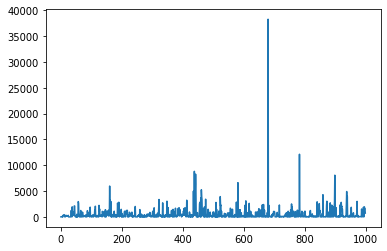

In [61]:
from  matplotlib.pyplot  import plot 
plot( list (range (len(intensidades)))[:1000] , intensidades[:1000],)

Metodo torneo representacion real

In [62]:
gen_len  = 10
interval = ( 12 , 60)
tamanio_poblacion  = 20

poblacion = [ Cromosoma([gen_len, gen_len, gen_len, gen_len] , [interval ,interval ,interval ,interval]) for _ in range (tamanio_poblacion)]
iterations  = 1000
fitnes = f3

#metodoDeSeleccion = seleccionRankingLineal
metodoDeReproduccio = reproducirReal
metodoDeMutacion  = mutarReal
metodoFiltro = seleccionTorneo

intensidades = []
mostrarcada = 100
for it in range (iterations):
    #padresSeleccionados = selecionarPares(15 , poblacion , fitnes , metodoDeSeleccion)
    padresSeleccionados = selecionarParesTorneo(15 , poblacion , fitnes)
    hijos  = reproducir(padresSeleccionados ,metodoDeReproduccio )
    hijos  = [ metodoDeMutacion (hijo) for hijo in hijos ]
    intensidades.append( intensidadDeSeleccion(poblacion, hijos, fitnes))
    poblacion.extend(hijos)
    poblacion = [ metodoFiltro(poblacion , fitnes , kontestants=2) for _ in range (15) ]

    #if intensidades[-1]== 0 :
    #    break

    if (it  % mostrarcada == 0 ) :
        optimo= poblacion[0]
        print ("it " , it , "Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

    
optimo = poblacion[0]    

print ("Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )
resultadosReal["torneo"] =  (fitnes ( *optimo.Fenotipos()) ,  optimo.Fenotipos().copy() ,  intensidades.copy())


it  0 Minimo obtenido =  0.07205443534661095  en  : f( [12.235, 24.856, 13.079, 56.34] )
it  100 Minimo obtenido =  0.0014046716922290967  en  : f( [13.971, 13.689, 18.522, 56.809] )
it  200 Minimo obtenido =  0.0006114169436729618  en  : f( [13.548, 13.126, 18.522, 56.809] )
it  300 Minimo obtenido =  8.962353609606991e-09  en  : f( [12.61, 12.047, 18.522, 56.809] )
it  400 Minimo obtenido =  1.096858625414848e-05  en  : f( [12.891, 12.047, 18.522, 56.809] )
it  500 Minimo obtenido =  8.962353609606991e-09  en  : f( [12.61, 12.047, 18.522, 56.809] )
it  600 Minimo obtenido =  1.096858625414848e-05  en  : f( [12.891, 12.047, 18.522, 56.809] )
it  700 Minimo obtenido =  8.962353609606991e-09  en  : f( [12.61, 12.047, 18.522, 56.809] )
it  800 Minimo obtenido =  8.962353609606991e-09  en  : f( [12.61, 12.047, 18.522, 56.809] )
it  900 Minimo obtenido =  8.962353609606991e-09  en  : f( [12.61, 12.047, 18.522, 56.809] )
Minimo obtenido =  8.962353609606991e-09  en  : f( [12.61, 12.047, 18.

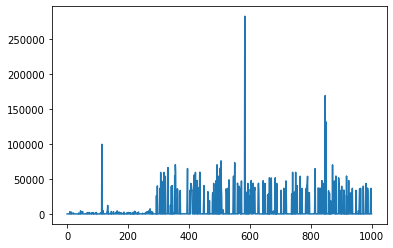

In [63]:
from  matplotlib.pyplot  import plot 
plot( list (range (len(intensidades)))[:1000] , intensidades[:1000],)

Metodo uniforme representacion real

In [64]:
gen_len  = 10
interval = ( 12 , 60)
tamanio_poblacion  = 20

poblacion = [ Cromosoma([gen_len, gen_len, gen_len, gen_len] , [interval ,interval ,interval ,interval]) for _ in range (tamanio_poblacion)]
iterations  = 1000
fitnes = f3

metodoDeSeleccion = seleccionUniforme
metodoDeReproduccio = reproducirReal
metodoDeMutacion  = mutarReal
metodoFiltro = seleccionTorneo
mostrarcada =100
intensidades = []

for it in range (iterations):
    padresSeleccionados = selecionarPares(15 , poblacion , fitnes , metodoDeSeleccion)
    hijos  = reproducir(padresSeleccionados ,metodoDeReproduccio )
    hijos  = [ metodoDeMutacion (hijo) for hijo in hijos ]
    intensidades.append( intensidadDeSeleccion(poblacion, hijos, fitnes))
    poblacion.extend(hijos)
    poblacion = [ metodoFiltro(poblacion , fitnes , kontestants=2) for _ in range (15) ]

    #if intensidades[-1]== 0 :
    #    break

    if (it  % mostrarcada == 0 ) :
        optimo= poblacion[0]
        print ("it " , it , "Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

    
optimo = poblacion[0]    

print ("Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )
resultadosReal["uniforme"] =  (fitnes ( *optimo.Fenotipos()) ,  optimo.Fenotipos().copy() ,  intensidades.copy())



it  0 Minimo obtenido =  0.7602590805845502  en  : f( [44.563, 34.71, 31.472, 48.364] )
it  100 Minimo obtenido =  6.742931091054593e-05  en  : f( [13.877, 13.877, 26.921, 46.909] )
it  200 Minimo obtenido =  2.601472859508281e-05  en  : f( [13.548, 13.924, 26.921, 46.909] )
it  300 Minimo obtenido =  4.60753124721669e-05  en  : f( [14.534, 13.126, 26.921, 46.909] )
it  400 Minimo obtenido =  2.1778509862669268e-07  en  : f( [13.689, 13.267, 26.921, 46.909] )
it  500 Minimo obtenido =  0.026721228144480726  en  : f( [14.487, 13.314, 13.361, 46.909] )
it  600 Minimo obtenido =  0.00016291126747687774  en  : f( [12.563, 13.22, 26.921, 46.909] )
it  700 Minimo obtenido =  2.1318793268047267e-05  en  : f( [13.736, 13.689, 26.921, 46.909] )
it  800 Minimo obtenido =  0.017814701552920198  en  : f( [13.455, 12.938, 13.361, 46.909] )
it  900 Minimo obtenido =  2.909363964809791e-05  en  : f( [13.22, 13.267, 26.921, 46.909] )
Minimo obtenido =  1.6265041374564945e-05  en  : f( [12.938, 13.689,

In [65]:
gen_len  = 10
interval = ( 12 , 60)
tamanio_poblacion  = 20

poblacion = [ Cromosoma([gen_len, gen_len, gen_len, gen_len] , [interval ,interval ,interval ,interval]) for _ in range (tamanio_poblacion)]
iterations  = 1000
fitnes = f3

#metodoDeSeleccion = seleccionUniforme

metodoDeReproduccio = reproducirReal
metodoDeMutacion  = mutarReal
metodoFiltro = seleccionTorneo

mostrarcada = 100

intensidades = []

for it in range (iterations):
    #padresSeleccionados = selecionarPares(15 , poblacion , fitnes , metodoDeSeleccion)
    padresSeleccionados = seleccionRuleta (15 , poblacion , fitnes ,  seleccionProporcional)
    hijos  = reproducir(padresSeleccionados ,metodoDeReproduccio )
    hijos  = [ metodoDeMutacion (hijo) for hijo in hijos ]
    intensidades.append( intensidadDeSeleccion(poblacion, hijos, fitnes))
    poblacion.extend(hijos)
    poblacion = [ metodoFiltro(poblacion , fitnes , kontestants=2) for _ in range (15) ]

    #if intensidades[-1]== 0 :
    #    break

    if (it  % mostrarcada == 0 ) :
        optimo= poblacion[0]
        print ("it " , it , "Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

    
optimo = poblacion[0]    

print ("Minimo obtenido = " , fitnes ( *optimo.Fenotipos()) , " en  : f(" , optimo.Fenotipos(), ")"  )

resultadosReal["ruleta"] =  (fitnes ( *optimo.Fenotipos()) ,  optimo.Fenotipos().copy() ,  intensidades.copy())


it  0 Minimo obtenido =  0.0044891088450333995  en  : f( [30.862, 12.845, 42.78, 43.859] )
it  100 Minimo obtenido =  0.00012063482251273957  en  : f( [13.079, 12.61, 20.164, 52.68] )
it  200 Minimo obtenido =  0.0008119103120343317  en  : f( [13.361, 13.736, 20.164, 52.68] )
it  300 Minimo obtenido =  1.828483753186434e-06  en  : f( [14.065, 12.282, 20.164, 58.827] )
it  400 Minimo obtenido =  1.3700032224029268e-05  en  : f( [12.751, 14.721, 22.698, 58.827] )
it  500 Minimo obtenido =  0.010027980773882514  en  : f( [13.595, 13.783, 13.032, 58.827] )
it  600 Minimo obtenido =  0.00021896957005104547  en  : f( [13.971, 12.375, 22.698, 58.827] )
it  700 Minimo obtenido =  0.015374441754529693  en  : f( [13.971, 14.721, 13.032, 58.827] )
it  800 Minimo obtenido =  8.977463624513125e-06  en  : f( [12.938, 14.581, 22.698, 58.827] )
it  900 Minimo obtenido =  9.388748426441576e-05  en  : f( [14.815, 13.877, 22.698, 58.827] )
Minimo obtenido =  5.940803720421609e-05  en  : f( [13.83, 14.674

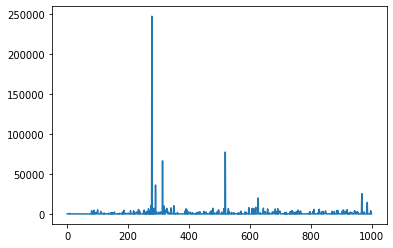

In [66]:
from  matplotlib.pyplot  import plot 
plot( list (range (len(intensidades)))[:1000] , intensidades[:1000],)

## Resultados Finales Parte 3.a

proporcional  Valor hallado  :  4.092438609862372e-09  punto hallado : [13.548, 12.0, 48.129, 23.402]


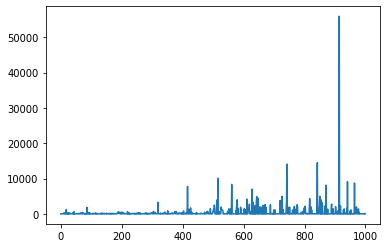

lineal  Valor hallado  :  1.823162447827309e-06  punto hallado : [14.956, 14.018, 58.358, 24.669]


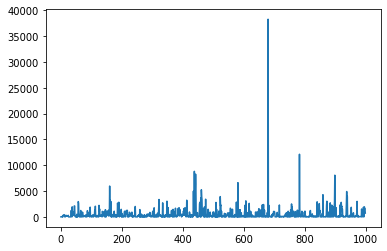

torneo  Valor hallado  :  8.962353609606991e-09  punto hallado : [12.61, 12.047, 18.522, 56.809]


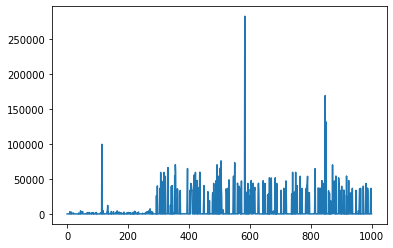

uniforme  Valor hallado  :  1.6265041374564945e-05  punto hallado : [12.938, 13.689, 26.921, 46.909]


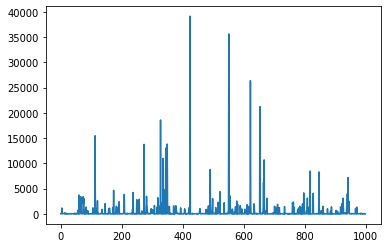

ruleta  Valor hallado  :  5.940803720421609e-05  punto hallado : [13.83, 14.674, 22.698, 58.827]


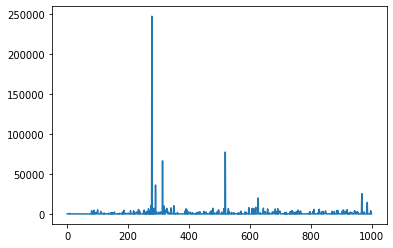

In [67]:
for key in resultadosReal.keys():
    print(key , " Valor hallado  : "  , resultadosReal[key][0]  ," punto hallado :" , resultadosReal[key][1])
    plt.plot( list (range (len(resultadosReal[key][2])))[:1000] , resultadosReal[key][2][:1000])
    plt.show()